# Bresenham's line algorithm

See [Bresenham's line algorithm](https://www.cs.helsinki.fi/group/goa/mallinnus/lines/bresenh.html).

In [1]:
import math
from typing import Tuple
from copy import deepcopy

import numpy as np
from matplotlib import pyplot as plt

EPS = np.finfo(float).eps

$ f(x) = mx +b$

-> $f(x,y) = \lambda \cdot (mx-y+b)$

$$D = f(x,y)$$

$$D' = \text{coef}\{m\} \cdot D$$

In [2]:
def plane_deter(point, m, d, dx = 1):
    a = m* dx
    b = - dx
    c = dx* d
    x, y = point
    result = (a*x + b*y + c)
    if math.fabs(result) < EPS:
        place = 0
    elif result >0:
        place = 1
    else:
        place = -1
    
    return place # 1: line below the given point, 0: on, 1: above
def f_generator(m, d):
    return lambda x, y: plane_deter((x,y), m , d)
#f = f_generator(m, d)

In [3]:
# p -> p1, p2 ,p3: p1(diagonal), p2(prime), p3(sub)
def next_points(point, m, dir = True):
    xi, yi = point
    dx = 1 if dir else -1
    dy = (1 if dir else -1) * (1 if m>=0 else -1)
    np_1 = [xi + dx, yi +dy]
    np_2, np_3 = [xi, yi+dy], [xi +dx, yi] 
    if math.fabs(m) < 1:
        np_2, np_3 = np_3, np_2
    return np_1, np_2, np_3

$$\text{coef}\{m\} \begin{cases} 
      1 & -\infty < m \leq -1\\
      -1 & -1 < m < 0\\
      1 & 0 \leq m < 1\\
      -1 & 1 \leq m < \infty> 
   \end{cases}$$

In [4]:
def coef(m):
    if m >= 0 :
        if m < 1:
            result = 1
        else:
            result = -1
    else:
        if m > -1:
            result = -1
        else:
            result = 1
    return result 

In [5]:
def points(
        initial_point, 
        line_param:Tuple[float, float], 
        p_range:Tuple[int, int],
        allow_cross_thick = False
        ):
        m, d = line_param
        f = f_generator(m, d)
        m_cor = coef(m)
        points_main =[initial_point]
        points_sub = []
        
        # positive direction
        dir = True
        p = deepcopy(initial_point)
        for i in range(0, p_range[1]):
            p1, p2, p3 = next_points(p, m, dir)
            pd = [(p1[0] + p2[0])/2, (p1[1] + p2[1])/2]
            D = (m_cor) * f(*pd)
            if D == 1:
                points_main.append(p1)
                if allow_cross_thick:
                    points_main.append(p2)
                    points_main.append(p3)
                pf = p1
            elif D == -1:
                points_main.append(p2)
                pf = p2
            else:
                points_main.append(p1)
                points_main.append(p2)
                p_ = [p1[0] + (p2[0]- p[0]), p1[1] + (p2[1]- p[1])]
                points_main.append(p_)
                pf = p_ # 2 step
            p = pf
        # negative direction
        dir = False
        p = deepcopy(initial_point)
        for i in range(0, p_range[0]):
            p1, p2, p3 = next_points(p, m, dir)
            pd = [(p1[0] + p2[0])/2, (p1[1] + p2[1])/2]
            D = (m_cor) * ( -f(*pd)) 
            if D == 1:
                points_main.append(p1)
                if allow_cross_thick:
                    points_main.append(p2)
                    points_main.append(p3)
                pf = p1
            elif D == -1:
                points_main.append(p2)
                pf = p2
            else:
                points_main.append(p1)
                points_main.append(p2)
                p_ = [p1[0] + (p2[0]- p[0]), p1[1] + (p2[1]- p[1])]
                points_main.append(p_)
                pf = p_ # 2 step
                
            p = pf
        return np.array(points_main), np.array(points_sub)


## Test

In [6]:
pi = [1, 1] # center point
Wx = 0.2
Wy = 0.3
ms = [Wy/Wx]
#ms = [ 0, 0.5, 1, 2, -0.6, -1, -3]
bs = [pi[1] - m*pi[0] for m in ms ]

In [7]:
def line(x, m, b):
    return m * x + b

In [10]:
n =30
x = 1.2*n
line_points = [[[0, x], [line(0, m, b), line(x, m, b)]] for m, b in zip(ms, bs)]
p_range = (30, 30)
int_points = [points(pi, line_param=[m, b], p_range=p_range, allow_cross_thick=True) for m, b in zip(ms, bs)]
points_ = [[p[0][:-1, 0], p[0][:-1, 1]] for p in int_points]

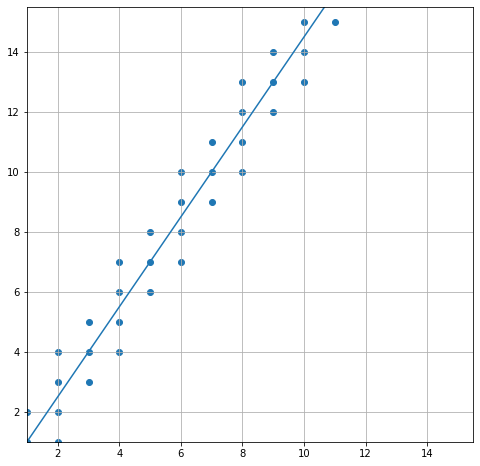

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
for l_p in line_points:
    ax.plot(l_p[0], l_p[1])
for point in points_:
    ax.scatter(point[0], point[1])
ax.set_xlim(1, n/2+0.5)
ax.set_ylim(1, n/2+0.5)
ax.grid()
plt.show()